In [1]:
import sys
import pandas
import matplotlib
import seaborn
import sklearn

print(sys.version)
print(pandas.__version__)
print(matplotlib.__version__)
print(seaborn.__version__)
print(sklearn.__version__)

3.6.3 |Anaconda custom (64-bit)| (default, Oct 15 2017, 03:27:45) [MSC v.1900 64 bit (AMD64)]
0.22.0
2.1.0
0.8.0
0.19.1


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
import pandas as pd

In [96]:
games = pd.read_csv('./games.csv')

In [97]:
games.head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


In [6]:
games.shape

(81312, 20)

In [7]:
games.columns

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')

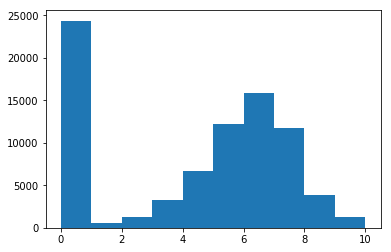

In [8]:
plt.hist(games['average_rating'])
plt.show()

In [9]:
games.isna().sum()

id                       0
type                     0
name                    41
yearpublished            3
minplayers               3
maxplayers               3
playingtime              3
minplaytime              3
maxplaytime              3
minage                   3
users_rated              0
average_rating           0
bayes_average_rating     0
total_owners             0
total_traders            0
total_wanters            0
total_wishers            0
total_comments           0
total_weights            0
average_weight           0
dtype: int64

In [12]:
games.shape

(81312, 20)

In [13]:
games.columns

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')

In [14]:
## average rating we are going to predict based on other features

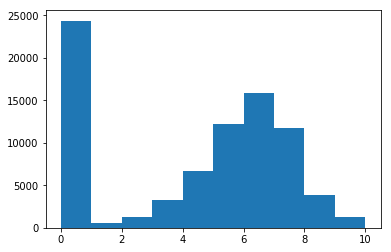

In [15]:
plt.hist(games['average_rating'])
plt.show()

In [16]:
## print the first row of all the games with zero scores

In [33]:
games.loc[games.average_rating==0, : ].sum()

id                                                             2226355044
type                    boardgameboardgameboardgameboardgameboardgameb...
yearpublished                                                 4.01647e+07
minplayers                                                          47822
maxplayers                                                         141080
playingtime                                                        787764
minplaytime                                                        736246
maxplaytime                                                        787764
minage                                                             135601
users_rated                                                             0
average_rating                                                          0
bayes_average_rating                                                    0
total_owners                                                        36963
total_traders                         

In [30]:
games[games.average_rating>0 ].sum()

id                                                             3650725900
type                    boardgameboardgameboardgameboardgameboardgameb...
yearpublished                                                 1.06731e+08
minplayers                                                         114147
maxplayers                                                         317316
playingtime                                                   3.41061e+06
minplaytime                                                    3.2704e+06
maxplaytime                                                   3.41061e+06
minage                                                             432259
users_rated                                                      13163322
average_rating                                                     342498
bayes_average_rating                                              94129.4
total_owners                                                     21307641
total_traders                         

In [34]:
## remove all rows without any user reviews
games = games.loc[games.average_rating >0,  ]

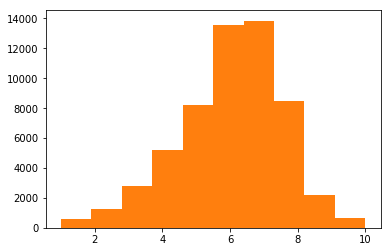

In [40]:
## remove any rors with missing values
games = games.dropna(how = 'any')

## make a histogram
plt.hist(games['average_rating'])
plt.show()

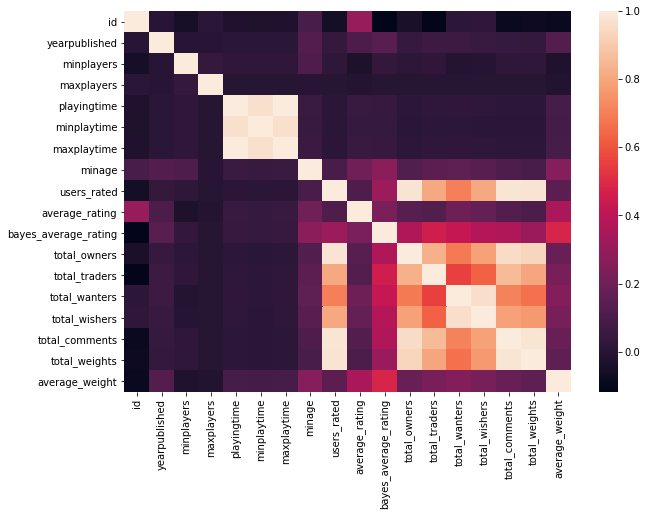

In [50]:
##drop irrelevant columns
corrmat = games.corr()

fig = plt.figure(figsize=(10,7))
sns.heatmap(corrmat)
plt.show()

In [51]:
## remove unwanted columns
columns = games.columns.tolist()

In [52]:
## filter the columns to remove the data we dont want
##'bayes_average_rating'  'average_rating'  'id','type','name',

['id',
 'type',
 'name',
 'yearpublished',
 'minplayers',
 'maxplayers',
 'playingtime',
 'minplaytime',
 'maxplaytime',
 'minage',
 'users_rated',
 'average_rating',
 'bayes_average_rating',
 'total_owners',
 'total_traders',
 'total_wanters',
 'total_wishers',
 'total_comments',
 'total_weights',
 'average_weight']

In [102]:
# Remove all na
games.shape

(81268, 20)

In [101]:
games.dropna(how='any', inplace=True)

In [103]:
games1 = games.drop(['bayes_average_rating' , 'average_rating' , 'id','type','name',], axis = 1)

In [104]:
target = games.average_rating

In [82]:
## we have X and y
## X = games1 and y = target

In [105]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(games1, target, test_size=0.2, random_state=1)

In [106]:
X_train.shape

(65014, 15)

In [107]:
X_test.shape

(16254, 15)

In [108]:
## Import Linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Initialize the model class
LR = LinearRegression()



In [109]:
## fit the model in training data
LR.fit(X_train, y_train, sample_weight=None)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [111]:
## Generate prediction for test set
predictions = LR.predict(X_test)

In [112]:
## compare the value between the predictions and y_test values
mean_squared_error(predictions, y_test)

6.303449479513492

In [113]:
## It should be zero, so our model is bad

In [114]:
#####################################################################
######################################################################
########## Random Forest #############################################

In [116]:
## Import RF model
from sklearn.ensemble import RandomForestRegressor
## Initialize the model

RFR = RandomForestRegressor(n_estimators= 100, min_samples_leaf= 10, random_state= 1)

## fit to the data
RFR.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [119]:
## Make some predictions
predictions = RFR.predict(X_test)

## compute the error between our test predictions and actual values of test data

mean_squared_error(predictions, y_test)



1.0548030619987834

In [131]:
X_test.iloc[2, :]

yearpublished     2009.0000
minplayers           2.0000
maxplayers           4.0000
playingtime         45.0000
minplaytime         45.0000
maxplaytime         45.0000
minage               8.0000
users_rated         54.0000
total_owners       148.0000
total_traders       24.0000
total_wanters        5.0000
total_wishers       21.0000
total_comments      25.0000
total_weights        9.0000
average_weight       2.5556
Name: 10204, dtype: float64

In [132]:
## predict a indivisual value for both model

rating_LR = LR.predict(X_test.iloc[2, :].values.reshape(1,-1))

rating_RFR = RFR.predict(X_test.iloc[2, :].values.reshape(1,-1))

print(rating_LR)
print(rating_RFR)



[6.43022278]
[6.20646422]


In [133]:
## what was the actual value for this
y_test.iloc[2,]

5.825